# This notebook contains more advanced examples

In [1]:
%matplotlib inline

from __future__ import division, absolute_import, print_function

import lmfit
import matplotlib.pyplot as plt
import numpy as np

from resonator import background, reflection, see

In [2]:
# Make some fake data to use for the example fits
f_r = 1e9
frequency = np.linspace(f_r - 1e6, f_r + 1e6, 501)
bg = background.ComplexConstant().func(frequency=frequency, magnitude=0.01, phase=np.pi / 3)
fg = reflection.Reflection().func(frequency=frequency, resonance_frequency=f_r, internal_loss=1e-5, coupling_loss=5e-5)
data = bg * fg + 0.0002 * (np.random.randn(frequency.size) + 1j * np.random.randn(frequency.size))

## Use initial params to improve on the guessing function

The default algorithm used by `lmfit` is Levenberg-Marquardt, which is fast but finds only the local minimum of the residual function given by the initial values. The most common reason for a fit to fail is that the `guess()` function provides initial values that are in a local minimum that is not the global minimum. If a data set that looks "reasonable" fails to converge to the correct values, a quick fix is to try different initial values. Keywords 

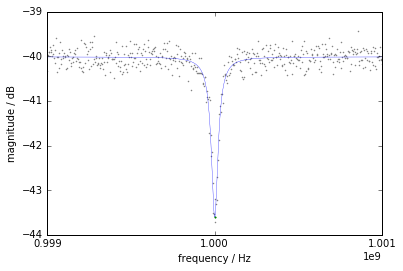

In [4]:
params = lmfit.Parameters()
params.add(name='resonance_frequency', value=1e9) 
r = reflection.ReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = plt.subplots()
see.magnitude_vs_frequency(resonator=r, axes=ax);

## Use initial parameters to control whether or not to vary a parameter in the fit

For example, the value of the coupling can be fixed to a value from a simulation. 

[[Model]]
    (Model(complex_constant) * Model(reflection))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 1002
    # variables        = 4
    chi-square         = 4.1986e-05
    reduced chi-square = 4.2070e-08
    Akaike info crit   = -17013.8981
    Bayesian info crit = -16994.2591
[[Variables]]
    magnitude:            0.00998445 +/- 9.5965e-06 (0.10%) (init = 0.01037561)
    phase:               -5.23424786 +/- 9.6139e-04 (0.02%) (init = -5.289198)
    resonance_frequency:  1.0000e+09 +/- 111.060801 (0.00%) (init = 1.000004e+09)
    internal_loss:        1.0184e-05 +/- 2.2372e-07 (2.20%) (init = 2.671761e-05)
    coupling_loss:        5e-05 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(phase, resonance_frequency) = -0.254
    C(magnitude, internal_loss)   =  0.253



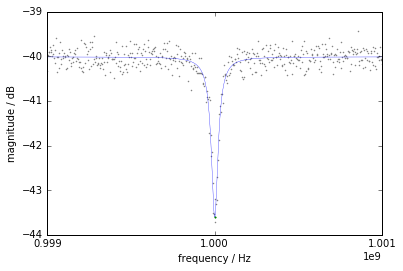

In [3]:
params = lmfit.Parameters()
params.add(name='coupling_loss', value=5e-5, vary=False)
r = reflection.ReflectionFitter(frequency=frequency, data=data, params=params)
fig, ax = plt.subplots()
see.magnitude_vs_frequency(resonator=r, axes=ax)
print(r.result.fit_report())

## Use a fitting algorithm other than Levenberg-Marquardt

Instead of using better initial values, it may help to use a different fitting algorithm. Extra keywords passed to the `__init__` and `fit()` methods of a `ResonatorFitter` are passed on to the `fit()` method of the `CompositeModel`. If they don't match keywords of this method, they are passed on to the fit function itself. See the `lmfit` documentation.

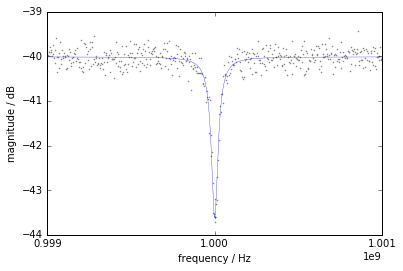

In [5]:
r = reflection.ReflectionFitter(frequency=frequency, data=data, method='basinhopping')
fig, ax = plt.subplots()
see.magnitude_vs_frequency(resonator=r, axes=ax);